In [1]:
!pip install xlrd
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.2 MB/s eta 0:00:00


In [2]:
# Read the Excel file
df = pd.read_excel('/kaggle/input/concrete-comprehensive-strength/Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [4]:
## renaming column names
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'BFS',
       'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash',
       'Water  (component 4)(kg in a m^3 mixture)':'Water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarser_agg',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_agg',
       'Age (day)':'Days',
       'Concrete compressive strength(MPa, megapascals) ':'Comp_str'})

In [5]:
df.columns

Index(['Cement', 'BFS', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarser_agg',
       'Fine_agg', 'Days', 'Comp_str'],
      dtype='object')

In [6]:
##checking the data statistics
df.describe()

,Cement,BFS,Fly_Ash,Water,Superplasticizer,Coarser_agg,Fine_agg,Days,Comp_str
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [7]:
df.isna().sum()

Cement              0
BFS                 0
Fly_Ash             0
Water               0
Superplasticizer    0
Coarser_agg         0
Fine_agg            0
Days                0
Comp_str            0
dtype: int64

Text(0, 0.5, 'Comp_str')

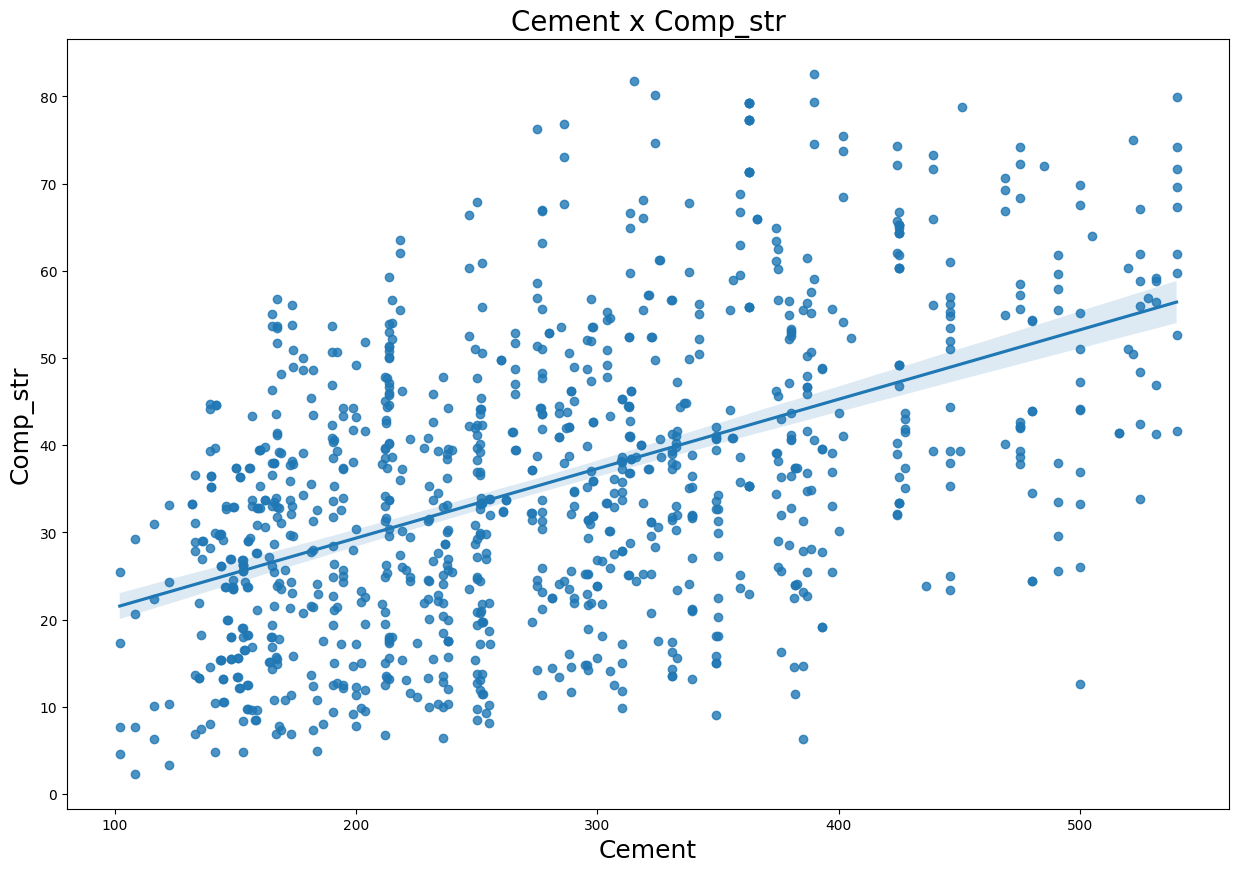

In [8]:
import matplotlib.pyplot as plt  # Importing pyplot from matplotlib
import seaborn as sns           # Importing seaborn
## Plotting scatterplot to check if there's a relation between variables
plt.figure(figsize=(15,10))
sns.regplot(x='Cement',y='Comp_str', data=df)
plt.title("Cement x Comp_str", size=20)
plt.xlabel("Cement", size=18)
plt.ylabel("Comp_str", size = 18)